# Installing Libraries 

## Install Pandas

In [52]:
# import sys
# !{sys.executable} -m pip install pandas

## Install Seaborn

In [53]:
# import sys
# !{sys.executable} -m pip install seaborn

## Install Plotly

In [54]:
# import sys
# !{sys.executable} -m pip install plotly

## Install Keplergl

In [55]:
# import sys
# !conda install -c conda-forge keplergl 

# Importing Libraries 

In [56]:
# Import Pandas
import pandas as pd
# Import Seaborn 
import seaborn as sns
#Import Matplot Lib
import matplotlib.pyplot as plt
# Import Keplergl Library
import keplergl
# Import Plotly Library 
import plotly.express as px

# DataFrame - Settings

In [57]:
# Set the number of columns to display. If none then all will be displayed.
pd.options.display.max_columns = None
# Set the number of max rows to display. If none then all will be displayed.
# pd.options.display.max_rows = None

# Import Data - Pandas DataFrame

In [58]:
# Create a data frame and load in data 
df_listings = pd.read_csv('Datasets/Seattle Airbnb Open Data/listings.csv')

In [59]:
df_listings.shape

(3818, 92)

In [60]:
df_listings.columns.values.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


# Clean Data

## Selecting a subset of the Data 

In [61]:
df_listings_clean = df_listings[['id',  'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'host_id', 'host_name', 'host_since',
       'host_location',  'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count', 'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'cancellation_policy',
       'reviews_per_month']]

## Checking Column Datatypes 

In [62]:
df_listings_clean.dtypes

id                                int64
name                             object
summary                          object
space                            object
description                      object
experiences_offered              object
neighborhood_overview            object
transit                          object
host_id                           int64
host_name                        object
host_since                       object
host_location                    object
host_response_rate               object
host_acceptance_rate             object
host_neighbourhood               object
host_listings_count             float64
host_total_listings_count       float64
street                           object
neighbourhood                    object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
city                             object
state                            object
zipcode                          object
market                           object


## Fixing Datatypes 

### Price

In [63]:
df_listings_clean['price'].apply(type).value_counts()

price
<class 'str'>    3818
Name: count, dtype: int64

In [64]:
df_listings_clean['price'].head(5)

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [65]:
df_listings_clean['price'] = df_listings_clean['price'].replace(r'[\$,]', '', regex=True).astype(float)

/var/folders/4l/xm5jn32j517d842_nfd4nvymkgphp6/T/ipykernel_1008/3293690030.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Date

In [66]:
df_listings_clean['host_since'].head(5)

0    2011-08-11
1    2013-02-21
2    2014-06-12
3    2013-11-06
4    2011-11-29
Name: host_since, dtype: object

In [67]:
df_listings_clean['host_since'] = pd.to_datetime(df_listings_clean['host_since'])

/var/folders/4l/xm5jn32j517d842_nfd4nvymkgphp6/T/ipykernel_1008/2428450490.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
df_listings_clean['host_since'].head(5)

0   2011-08-11
1   2013-02-21
2   2014-06-12
3   2013-11-06
4   2011-11-29
Name: host_since, dtype: datetime64[ns]

## Dealing with Missing Values 

In [69]:
df_listings_clean.dtypes.value_counts()

object            27
float64           13
int64              3
datetime64[ns]     1
Name: count, dtype: int64

In [70]:
df_listings_clean.dtypes == 'object'

id                              False
name                             True
summary                          True
space                            True
description                      True
experiences_offered              True
neighborhood_overview            True
transit                          True
host_id                         False
host_name                        True
host_since                      False
host_location                    True
host_response_rate               True
host_acceptance_rate             True
host_neighbourhood               True
host_listings_count             False
host_total_listings_count       False
street                           True
neighbourhood                    True
neighbourhood_cleansed           True
neighbourhood_group_cleansed     True
city                             True
state                            True
zipcode                          True
market                           True
smart_location                   True
country_code

In [71]:
cat_variables =  df_listings_clean.columns[df_listings_clean.dtypes == 'object']
num_variables = df_listings_clean.columns[df_listings_clean.dtypes != 'object']

In [72]:
print(len(cat_variables))
print(len(num_variables))

27
17


In [73]:
(df_listings_clean[num_variables].isnull().sum().sort_values(ascending=False)/len(df_listings_clean))*100

square_feet                  97.459403
review_scores_accuracy       17.234154
review_scores_cleanliness    17.103195
review_scores_rating         16.946045
reviews_per_month            16.422211
bathrooms                     0.419068
bedrooms                      0.157150
host_total_listings_count     0.052383
host_listings_count           0.052383
host_since                    0.052383
beds                          0.026192
longitude                     0.000000
accommodates                  0.000000
host_id                       0.000000
latitude                      0.000000
price                         0.000000
id                            0.000000
dtype: float64

In [74]:
df_listings_clean[df_listings_clean['beds'].isnull()]

,id,name,summary,space,description,experiences_offered,neighborhood_overview,transit,host_id,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,cancellation_policy,reviews_per_month
1961,609252,Sans souci in Seattle,NaN,"In the Pacific Northwest's Emerald City, treat...","In the Pacific Northwest's Emerald City, treat...",none,NaN,NaN,3018655,Louise,2012-07-22,"Seattle, Washington, United States",100%,NaN,Greenwood,2.0,2.0,"6th Ave NW, Seattle, WA 98117, United States",Greenwood,Greenwood,Other neighborhoods,Seattle,WA,98117,Seattle,"Seattle, WA",US,47.698613,-122.363442,House,Private room,4,NaN,1.0,NaN,Real Bed,{},NaN,280.0,NaN,NaN,NaN,flexible,NaN


In [75]:
df_listings_clean[cat_variables].isnull().sum().sort_values(ascending=False)/len(df_listings_clean)

neighborhood_overview           0.270299
transit                         0.244631
host_acceptance_rate            0.202462
space                           0.149031
host_response_rate              0.136983
neighbourhood                   0.108958
host_neighbourhood              0.078575
summary                         0.046359
host_location                   0.002095
zipcode                         0.001833
host_name                       0.000524
property_type                   0.000262
bed_type                        0.000000
amenities                       0.000000
room_type                       0.000000
country_code                    0.000000
smart_location                  0.000000
market                          0.000000
name                            0.000000
state                           0.000000
city                            0.000000
neighbourhood_group_cleansed    0.000000
neighbourhood_cleansed          0.000000
street                          0.000000
experiences_offe

In [76]:
df_listings_clean['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [77]:
# df_listings_clean.count() / len(df_listings_clean)

In [78]:
df_listings_clean.isnull().sum()

id                                 0
name                               0
summary                          177
space                            569
description                        0
experiences_offered                0
neighborhood_overview           1032
transit                          934
host_id                            0
host_name                          2
host_since                         2
host_location                      8
host_response_rate               523
host_acceptance_rate             773
host_neighbourhood               300
host_listings_count                2
host_total_listings_count          2
street                             0
neighbourhood                    416
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
city                               0
state                              0
zipcode                            7
market                             0
smart_location                     0
country_code                       0
l

In [79]:
df_listings_clean.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,transit,host_id,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,cancellation_policy,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,956883,Maija,2011-08-11,"Seattle, Washington, United States",96%,100%,Queen Anne,3.0,3.0,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,95.0,10.0,10.0,moderate,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...","Convenient bus stops are just down the block, ...",5177328,Andrea,2013-02-21,"Seattle, Washington, United States",98%,100%,Queen Anne,6.0,6.0,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,96.0,10.0,10.0,strict,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,2014-06-12,"Seattle, Washington, United States",67%,100%,Queen Anne,2.0,2.0,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,47.629724,-122.369483,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,975.0,97.0,10.0,10.0,strict,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,Queen Anne,1.0,1.0,"8th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,47.638473,-122.369279,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,100.0,NaN,NaN,NaN,flexible,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,The nearest public transit bus (D Line) is 2 b...,1452570,Emily,2011-11-29,"Seattle, Washington, United States",100%,NaN,Queen Anne,2.0,2.0,"14th Ave W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,47.632918,-122.372471,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,450.0,92.0,9.0,9.0,strict,0.89


In [80]:
df_listings_clean.tail()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,transit,host_id,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,cancellation_policy,reviews_per_month
3813,8101950,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,NaN,31148752,Bo,2015-04-13,US,99%,100%,Holly,354.0,354.0,"Northwest 48th Street, Seattle, WA 98107, Unit...",Fremont,Fremont,Other neighborhoods,Seattle,WA,98107,Seattle,"Seattle, WA",US,47.664295,-122.359170,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,359.0,80.0,8.0,10.0,strict,0.3
3814,8902327,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,Uber and Car2go are good options in Seattle. T...,46566046,Glen,2015-10-14,"Seattle, Washington, United States",100%,100%,Portage Bay,1.0,1.0,"Fuhrman Avenue East, Seattle, WA 98102, United...",Portage Bay,Portage Bay,Capitol Hill,Seattle,WA,98102,Seattle,"Seattle, WA",US,47.649552,-122.318309,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,79.0,100.0,10.0,10.0,moderate,2.0
3815,10267360,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,NaN,52791370,Virginia,2015-12-30,US,NaN,NaN,NaN,1.0,1.0,"South Laurel Street, Seattle, WA 98178, United...",NaN,Rainier Beach,Rainier Valley,Seattle,WA,98178,Seattle,"Seattle, WA",US,47.508453,-122.240607,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN,93.0,NaN,NaN,NaN,moderate,NaN
3816,9604740,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,Yes,25522052,Karen,2015-01-03,"Tacoma, Washington, United States",100%,NaN,NaN,1.0,1.0,"43rd Avenue East, Seattle, WA 98112, United St...",NaN,Madison Park,Capitol Hill,Seattle,WA,98112,Seattle,"Seattle, WA",US,47.632335,-122.275530,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,99.0,NaN,NaN,NaN,moderate,NaN
3817,10208623,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,NaN,14703116,Gil,2014-04-25,"Seattle, Washington, United States",100%,NaN,Queen Anne,1.0,1.0,"Westlake Avenue North, Seattle, WA 98109, Unit...",Queen Anne,East Queen Anne,Queen Anne,Seattle,WA,98109,Seattle,"Seattle, WA",US,47.641186,-122.342085,Apartment,Entire home/apt,3,1.5,2.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,87.0,NaN,NaN,NaN,flexible,NaN


In [81]:
df_listings.count() / len(df_listings_clean)

id                                  1.000000
listing_url                         1.000000
scrape_id                           1.000000
last_scraped                        1.000000
name                                1.000000
                                      ...   
cancellation_policy                 1.000000
require_guest_profile_picture       1.000000
require_guest_phone_verification    1.000000
calculated_host_listings_count      1.000000
reviews_per_month                   0.835778
Length: 92, dtype: float64

# Analysis

In [82]:
df_listings_clean.describe(include="all")

,id,name,summary,space,description,experiences_offered,neighborhood_overview,transit,host_id,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,cancellation_policy,reviews_per_month
count,3.818000e+03,3818,3641,3249,3818,3818,2786,2884,3.818000e+03,3816,3816,3810,3295,3045,3518,3816.000000,3816.000000,3818,3402,3818,3818,3818,3818,3811,3818,3818,3818,3818.000000,3818.000000,3817,3818,3818.000000,3802.000000,3812.000000,3817.000000,3818,3818,97.000000,3818.000000,3171.000000,3160.000000,3165.000000,3818,3191.000000
unique,NaN,3792,3478,3119,3742,1,2506,2574,NaN,1466,NaN,120,45,2,102,NaN,NaN,1442,81,87,17,7,2,28,1,7,1,NaN,NaN,16,3,NaN,NaN,NaN,NaN,5,3284,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,Convenient public transportation. The location...,NaN,Andrew,NaN,"Seattle, Washington, United States",100%,100%,Capitol Hill,NaN,NaN,"1st Avenue, Seattle, WA 98101, United States",Capitol Hill,Broadway,Other neighborhoods,Seattle,WA,98122,Seattle,"Seattle, WA",US,NaN,NaN,House,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,{},NaN,NaN,NaN,NaN,NaN,strict,NaN
freq,NaN,3,15,14,10,3818,17,32,NaN,56,NaN,3259,2371,3044,405,NaN,NaN,30,351,397,794,3810,3817,420,3818,3810,3818,NaN,NaN,1733,2541,NaN,NaN,NaN,NaN,3657,45,NaN,NaN,NaN,NaN,NaN,1417,NaN
mean,5.550111e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.578556e+07,NaN,2013-09-18 17:26:02.264151040,NaN,NaN,NaN,NaN,7.157757,7.157757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.628961,-122.333103,NaN,NaN,3.349398,1.259469,1.307712,1.735394,NaN,NaN,854.618557,127.976166,94.539262,9.636392,9.556398,NaN,2.078919
min,3.335000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.193000e+03,NaN,2008-11-10 00:00:00,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.505088,-122.417219,NaN,NaN,1.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,20.000000,20.000000,2.000000,3.000000,NaN,0.020000
25%,3.258256e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.275204e+06,NaN,2012-08-17 00:00:00,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.609418,-122.354320,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,420.000000,75.000000,93.000000,9.000000,9.000000,NaN,0.695000
50%,6.118244e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.055814e+07,NaN,2013-12-12 12:00:00,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.623601,-122.328874,NaN,NaN,3.000000,1.000000,1.000000,1.000000,NaN,NaN,750.000000,100.000000,96.000000,10.000000,10.000000,NaN,1.540000
75%,8.035127e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.590309e+07,NaN,2015-01-14 00:00:00,NaN,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.662694,-122.310800,NaN,NaN,4.000000,1.000000,2.000000,2.000000,NaN,NaN,1200.000000,150.000000,99.000000,10.000000,10.000000,NaN,3.000000
max,1.034016e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.320861e+07,NaN,2016-01-03 00:00:00,NaN,NaN,NaN,NaN,502.000000,502.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.733358,-122.240607,NaN,NaN,16.000000,8.000000,7.000000,15.000000,NaN,NaN,3000.000000,1000.000000,100.000000,10.000000,10.000000,NaN,12.150000


- The Broadway area clearly has the highest number of listings with approximately 400 counts
- This suggests it's the most active or populous neighborhood in the dataset

In [83]:
fig = px.histogram(df_listings_clean, x="neighbourhood_cleansed").update_xaxes(categoryorder="total descending")
fig.show()

- Broadway has a median average price
- This suggests it offers a good value proposition, which likely contributes to its popularity
- The moderate pricing combined with high listing count (from previous graph) indicates it\'s a high-demand, reasonably priced area
- Southeast Magnolia has the highest average price at approximately $231
- Waterfront areas (Magnolia, Portage Bay) tend to command higher prices
- Central locations (Broadway, Pioneer Square) show mid-range pricing

In [84]:
fig = px.histogram(
    df_listings_clean, 
    x="neighbourhood_cleansed",
    y="price",
    histfunc="avg"
)

fig.update_xaxes(categoryorder="total descending")
fig.show()

In [85]:
df_listings_clean['room_type'].value_counts()

room_type
Entire home/apt    2541
Private room       1160
Shared room         117
Name: count, dtype: int64

In [86]:
listing_types = df_listings_clean.groupby('room_type').size().reset_index(name='total')

In [87]:
listing_types

,room_type,total
0,Entire home/apt,2541
1,Private room,1160
2,Shared room,117


In [88]:

fig = px.bar(listing_types, x='room_type', y='total',  color='room_type')
fig.show()

In [89]:

fig = px.pie(listing_types, names='room_type', values='total',  color='room_type')
fig.show()

In [90]:
import plotly.express as px

# Create a count of listings by neighborhood and room type
room_by_neigh = df_listings_clean.groupby(['neighbourhood_cleansed', 'room_type']).size().reset_index(name='count')

# Create the interactive bar chart
fig = px.bar(room_by_neigh, 
             x='neighbourhood_cleansed',
             y='count',
             color='room_type',
             text_auto=True,
             title='Room Types Distribution by Neighborhood',
             labels={'neighbourhood_cleansed': 'Neighborhood',
                    'count': 'Number of Listings',
                    'room_type': 'Room Type'}
            )

# Customize the layout
fig.update_layout(
    xaxis_tickangle=-45,
    barmode='group',  # or 'stack' if you prefer stacked bars
    showlegend=True,
    height=600  # Make the plot a bit taller for better readability
)

# Show the plot
fig.show()


In [91]:
df_listings_clean.groupby(['neighbourhood_cleansed', 'room_type']).size().reset_index(name='count')

,neighbourhood_cleansed,room_type,count
0,Adams,Entire home/apt,49
1,Adams,Private room,21
2,Alki,Entire home/apt,33
3,Alki,Private room,9
4,Arbor Heights,Entire home/apt,3
...,...,...,...
198,Windermere,Entire home/apt,7
199,Windermere,Private room,3
200,Yesler Terrace,Entire home/apt,11
201,Yesler Terrace,Private room,5


In [92]:
room_by_neigh[room_by_neigh['room_type'] == "Private room"].sort_values(by= 'count', ascending=False)

,neighbourhood_cleansed,room_type,count
21,Broadway,Private room,93
113,Minor,Private room,56
51,Fremont,Private room,47
63,Greenwood,Private room,41
186,Wallingford,Private room,39
...,...,...,...
143,Pioneer Square,Private room,2
170,South Park,Private room,1
141,Pinehurst,Private room,1
157,Roxhill,Private room,1


In [93]:
room_by_neigh.query('room_type == "Private room"')

,neighbourhood_cleansed,room_type,count
1,Adams,Private room,21
3,Alki,Private room,9
5,Arbor Heights,Private room,2
7,Atlantic,Private room,18
9,Belltown,Private room,11
...,...,...,...
193,West Woodland,Private room,22
195,Westlake,Private room,5
197,Whittier Heights,Private room,8
199,Windermere,Private room,3


In [94]:
df_listings_clean[['neighbourhood_cleansed', 'room_type']].value_counts().reset_index(name = 'count')

,neighbourhood_cleansed,room_type,count
0,Broadway,Entire home/apt,281
1,Belltown,Entire home/apt,218
2,Wallingford,Entire home/apt,109
3,Fremont,Entire home/apt,108
4,Central Business District,Entire home/apt,96
...,...,...,...
198,Roxhill,Entire home/apt,1
199,Madison Park,Shared room,1
200,Lawton Park,Shared room,1
201,Industrial District,Shared room,1


In [95]:
room_by_neigh

,neighbourhood_cleansed,room_type,count
0,Adams,Entire home/apt,49
1,Adams,Private room,21
2,Alki,Entire home/apt,33
3,Alki,Private room,9
4,Arbor Heights,Entire home/apt,3
...,...,...,...
198,Windermere,Entire home/apt,7
199,Windermere,Private room,3
200,Yesler Terrace,Entire home/apt,11
201,Yesler Terrace,Private room,5


In [96]:
df_listings_clean.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

neighbourhood_cleansed
Southeast Magnolia    231.705882
Portage Bay           227.857143
Westlake              194.470588
West Queen Anne       187.769231
Montlake              182.789474
                         ...    
North Delridge         76.375000
Georgetown             76.125000
South Delridge         74.666667
Olympic Hills          71.687500
Rainier Beach          68.555556
Name: price, Length: 87, dtype: float64

(16.5, -0.5)

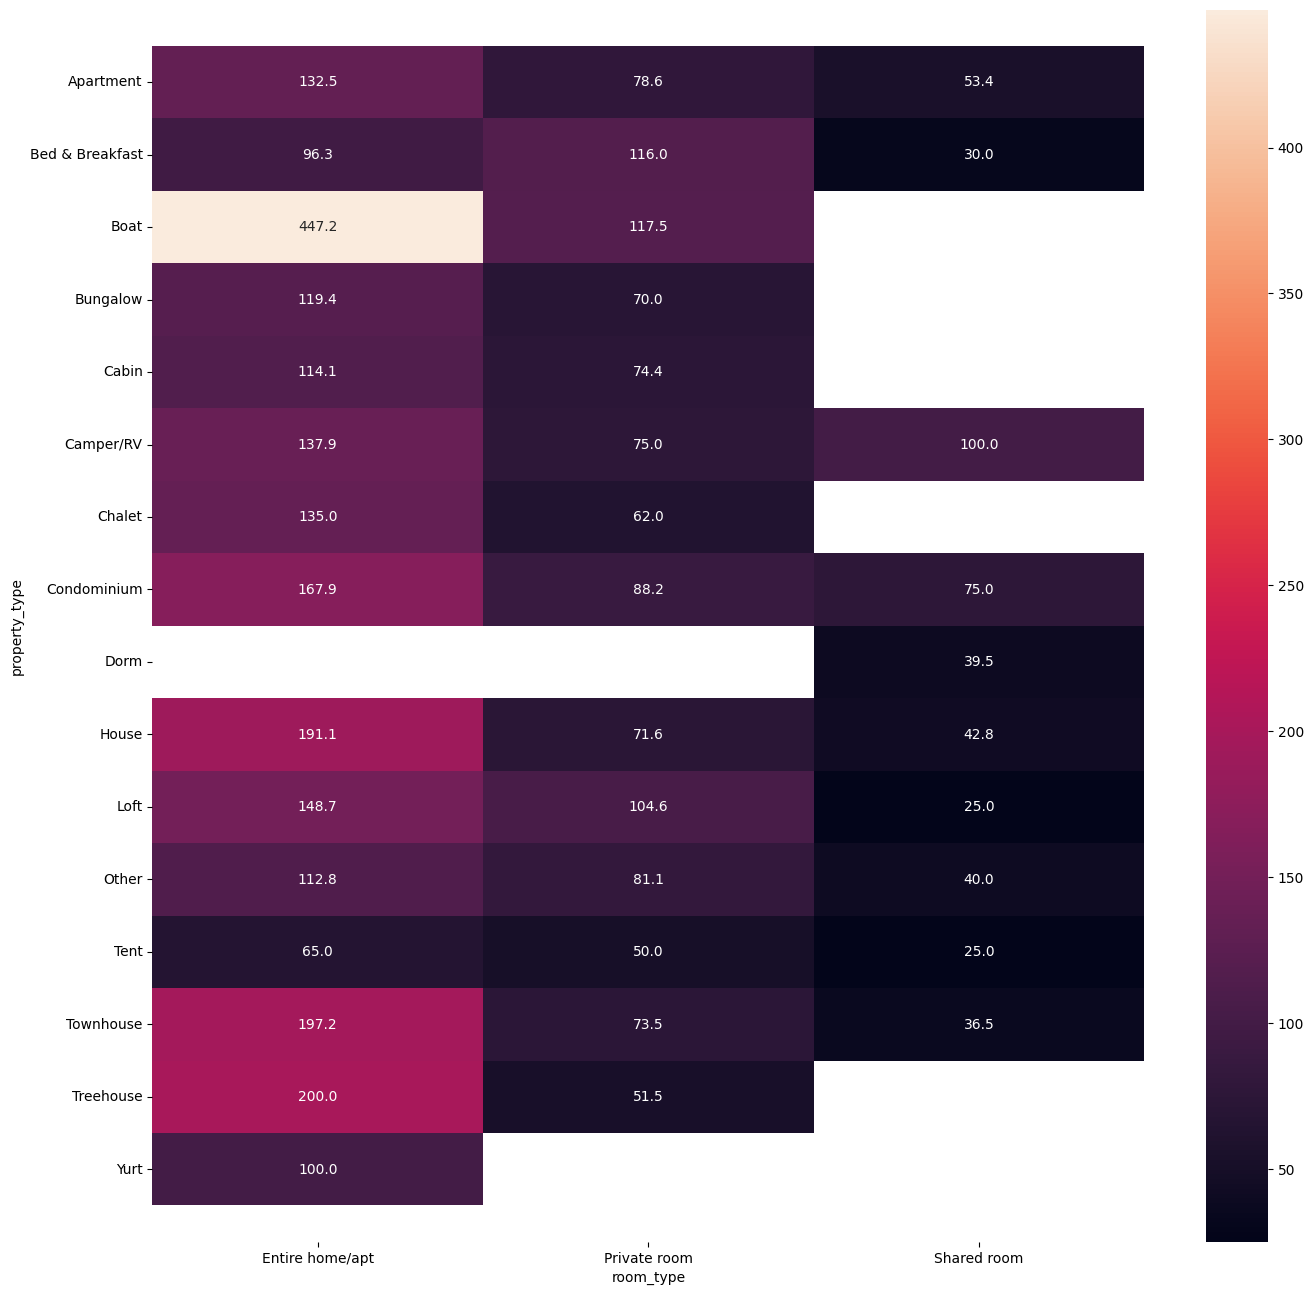

In [97]:
# Property type against Room type -- Mean Prices
plt.figure(figsize=(16,16))
ax = sns.heatmap(df_listings_clean.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".1f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [98]:
df_listings_clean.groupby(['property_type', 'room_type']).price.mean()

property_type    room_type      
Apartment        Entire home/apt    132.527311
                 Private room        78.593886
                 Shared room         53.372549
Bed & Breakfast  Entire home/apt     96.333333
                 Private room       115.969697
                 Shared room         30.000000
Boat             Entire home/apt    447.250000
                 Private room       117.500000
Bungalow         Entire home/apt    119.416667
                 Private room        70.000000
Cabin            Entire home/apt    114.125000
                 Private room        74.400000
Camper/RV        Entire home/apt    137.888889
                 Private room        75.000000
                 Shared room        100.000000
Chalet           Entire home/apt    135.000000
                 Private room        62.000000
Condominium      Entire home/apt    167.902778
                 Private room        88.166667
                 Shared room         75.000000
Dorm             Shared roo

In [99]:
fig = px.scatter_mapbox(df_listings_clean,
                      lat='latitude',
                      lon='longitude',
                      color ='property_type',
                      size = 'price',
                      width = 1600,
                      height = 900,
                      hover_data=['price', 'property_type'],
                      title='Property Locations', color_discrete_sequence=px.colors.cyclical.IceFire)

fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        zoom=13  # Adjust zoom level as needed
    ),
    margin={"r":0,"t":30,"l":0,"b":0}
)

fig.show()


/var/folders/4l/xm5jn32j517d842_nfd4nvymkgphp6/T/ipykernel_1008/732386439.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



## Keplergl Mapping

In [100]:
# Render an empty Keplergl Map
kepler_map = keplergl.KeplerGl(height=400)
kepler_map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [101]:
from keplergl import KeplerGl

# Clean the data by removing NaN values
df_map_clean = df_listings_clean.dropna(subset=['latitude', 'longitude', 'property_type', 'price', 'neighbourhood_cleansed'])

# Create map with initial configuration
map_settings = {
    'version': 'v1',
    'config': {
        'mapState': {
            'latitude': df_map_clean['latitude'].mean(),
            'longitude': df_map_clean['longitude'].mean(),
            'zoom': 11
        },
        'mapStyle': {
            'styleType': 'dark'
        }
    }
}

# Create map with settings
map_1 = KeplerGl(height=500, config=map_settings)

# Add the cleaned data to the map
map_1.add_data(
    data=df_map_clean[['latitude', 'longitude', 'property_type', 'price', 'neighbourhood_cleansed']], 
    name='airbnb_data'
)

# Save map to an HTML File
# map_1.save_to_html(file_name='keplergl_airbnb_map.html')

map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'latitude': np.float64(47.62898679966452), 'longitud…